In [1]:
import cv2
import numpy as np
import os
import random

In [2]:
path = "D:/Code/NHAP_MON_AI/Project/BLS/dataset/train"
path2 = "D:/Code/NHAP_MON_AI/Project/BLS/dataset_copy/train"
ls = os.listdir(path)  
for folder in ls:
    path_file = os.listdir(f"{path}/{folder}")
    for name in path_file:
        path_img = f"{path}/{folder}/{name}"
        image = cv2.imread(path_img)
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image_gray = cv2.resize(image_gray, (75, 100), interpolation=cv2.INTER_AREA)
        image_gray = image_gray.astype(np.float32)
        target_folder = f"{path2}/{folder}"
        if not os.path.exists(target_folder):
            os.makedirs(target_folder)
        cv2.imwrite(f"{target_folder}/{name}", image_gray)
        

In [3]:
char_to_num = {chr(i): i - ord('A') for i in range(ord('A'), ord('Z') + 1)}
path2 = "D:/Code/NHAP_MON_AI/Project/BLS/dataset_copy/train"
ls = os.listdir(path2)
target = np.eye(len(ls))
X = []
Y = []
for folder in ls:
    path_file = os.listdir(f"{path2}/{folder}")
    for name in path_file:
        path_img = f"{path2}/{folder}/{name}"
        image = cv2.imread(path_img, cv2.IMREAD_GRAYSCALE)
        image = image.astype(np.float32)
        image = cv2.normalize(image, image, 0, 1.0, cv2.NORM_MINMAX)
        image = image.reshape((1, 7500))
        # print(image)
        image = image[0]
        # print(image)
        X.append(image)
        Y.append(target[char_to_num[folder]])
train_sample = zip(X, Y)
train_sample = list(train_sample)
random.shuffle(train_sample)
X, Y = zip(*train_sample)
X = np.array(X)
Y = np.array(Y)
print(X)
print(Y)



[[0.6927711  0.6927711  0.6927711  ... 0.6144578  0.6204819  0.6084337 ]
 [0.53061223 0.53469384 0.5428571  ... 0.49795917 0.48571423 0.477551  ]
 [0.8161435  0.82062787 0.82062787 ... 0.69955164 0.61434984 0.52914804]
 ...
 [0.12888889 0.13333334 0.12888889 ... 0.85333335 0.8577778  0.86222225]
 [0.7871287  0.7920792  0.7970297  ... 0.67821777 0.6683168  0.65346533]
 [0.49268293 0.49756098 0.502439   ... 0.497561   0.48292682 0.46829268]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [4]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(1024, 512, 256, 128), activation='relu', solver='adam', max_iter=2000, random_state=42 )
mlp.fit(X,Y)


MLPClassifier(hidden_layer_sizes=(1024, 512, 256, 128), max_iter=2000,
              random_state=42)

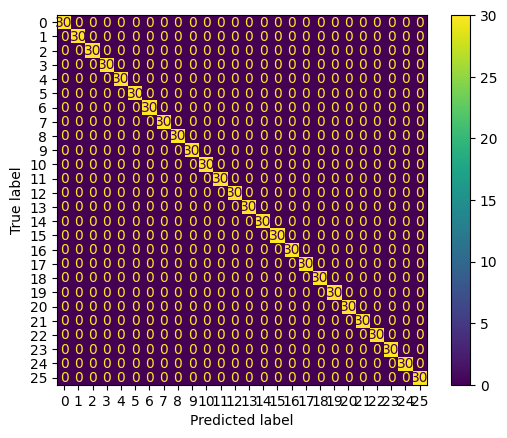

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np 
predictions = mlp.predict(X)
Y_multiclass = np.argmax(Y, axis=1)
predictions_multiclass = np.argmax(predictions, axis=1) 

cm = confusion_matrix(Y_multiclass, predictions_multiclass) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [6]:
import pickle
# # save to file
filename = 'BLS_model.sav'
pickle.dump(mlp, open(filename, 'wb'))